**Registro Clínicos de insuficiência cardiáca**



*  data set contém um conjunto de características 

  que podem ser usadas para prever a mortalidade por

  insuficiência cardíaca.







In [128]:
import pandas as pd
import matplotlib.pyplot as plt

importndo algumas das principais biblioteca como pandas e matplot

In [129]:
dataFrame = pd.read_csv('/content/drive/My Drive/heart_failure_clinical.csv')



atribuir a uma variável o dataset escolhido

In [130]:
dataFrame.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Com o método head() é possível ver as promeiras linha dos dataframe, por padrão ele exibe as primeiras 5 linhas

In [131]:
dataFrame.describe()
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Podemos usar o describe() e info() para retornar um resumo estatístico das variáveis númericas e obter um resumo de valores não-nulos encontrados respectivamente.

In [132]:
dataFrame.isnull().sum().sort_values(ascending=False)[:10]

DEATH_EVENT            0
time                   0
smoking                0
sex                    0
serum_sodium           0
serum_creatinine       0
platelets              0
high_blood_pressure    0
ejection_fraction      0
diabetes               0
dtype: int64

Usando a combinação de aalguns métodos como o isnull().sum() podemos ver a soma dos valores nulos encontrados. Podemos ver um alto número de dados faltantes em alguns atributos


In [133]:

dataFrame = dataFrame.dropna()

Verifica se existem valores NAN, ? ou dados faltantes

In [134]:
dataFrame = (dataFrame - dataFrame.min())/(dataFrame.max()-dataFrame.min())
dataFrame.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


Re-escala usando máxino e mínimo


In [135]:
X = dataFrame.iloc[:, :-3]
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0


In [136]:
Y = dataFrame.smoking
Y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: smoking, dtype: float64

Separando os dados em atributos descritores e atributos de classses ulizando o iloc()

In [137]:
from sklearn.model_selection import train_test_split

Dividindo a matriz em subconjuntos aleatórios de treino e teste com train_test_split

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [139]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex
277,0.545455,0.0,0.071319,1.0,0.363636,0.0,0.000000,0.067416,0.771429,1.0
229,0.581818,0.0,0.023986,0.0,0.166667,0.0,0.301734,0.078652,0.600000,0.0
225,0.636364,0.0,0.083184,1.0,0.696970,0.0,0.290823,0.101124,0.342857,0.0
130,0.236364,1.0,0.227737,0.0,0.696970,1.0,0.271427,0.022472,0.714286,1.0
153,0.181818,0.0,0.232585,1.0,0.318182,0.0,0.288833,0.076404,0.685714,1.0


In [140]:
Y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: smoking, dtype: float64

**Definindo o algoritmo de aprendizagem**

In [141]:
from sklearn.tree import DecisionTreeClassifier


In [142]:
classificador = DecisionTreeClassifier()


In [143]:
classificador.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

O algoritmo utizado para aprendizagem será a árvore de decisão

In [144]:
from sklearn.tree import plot_tree
plt.rcParams["figure.figsize"] = (30, 35)

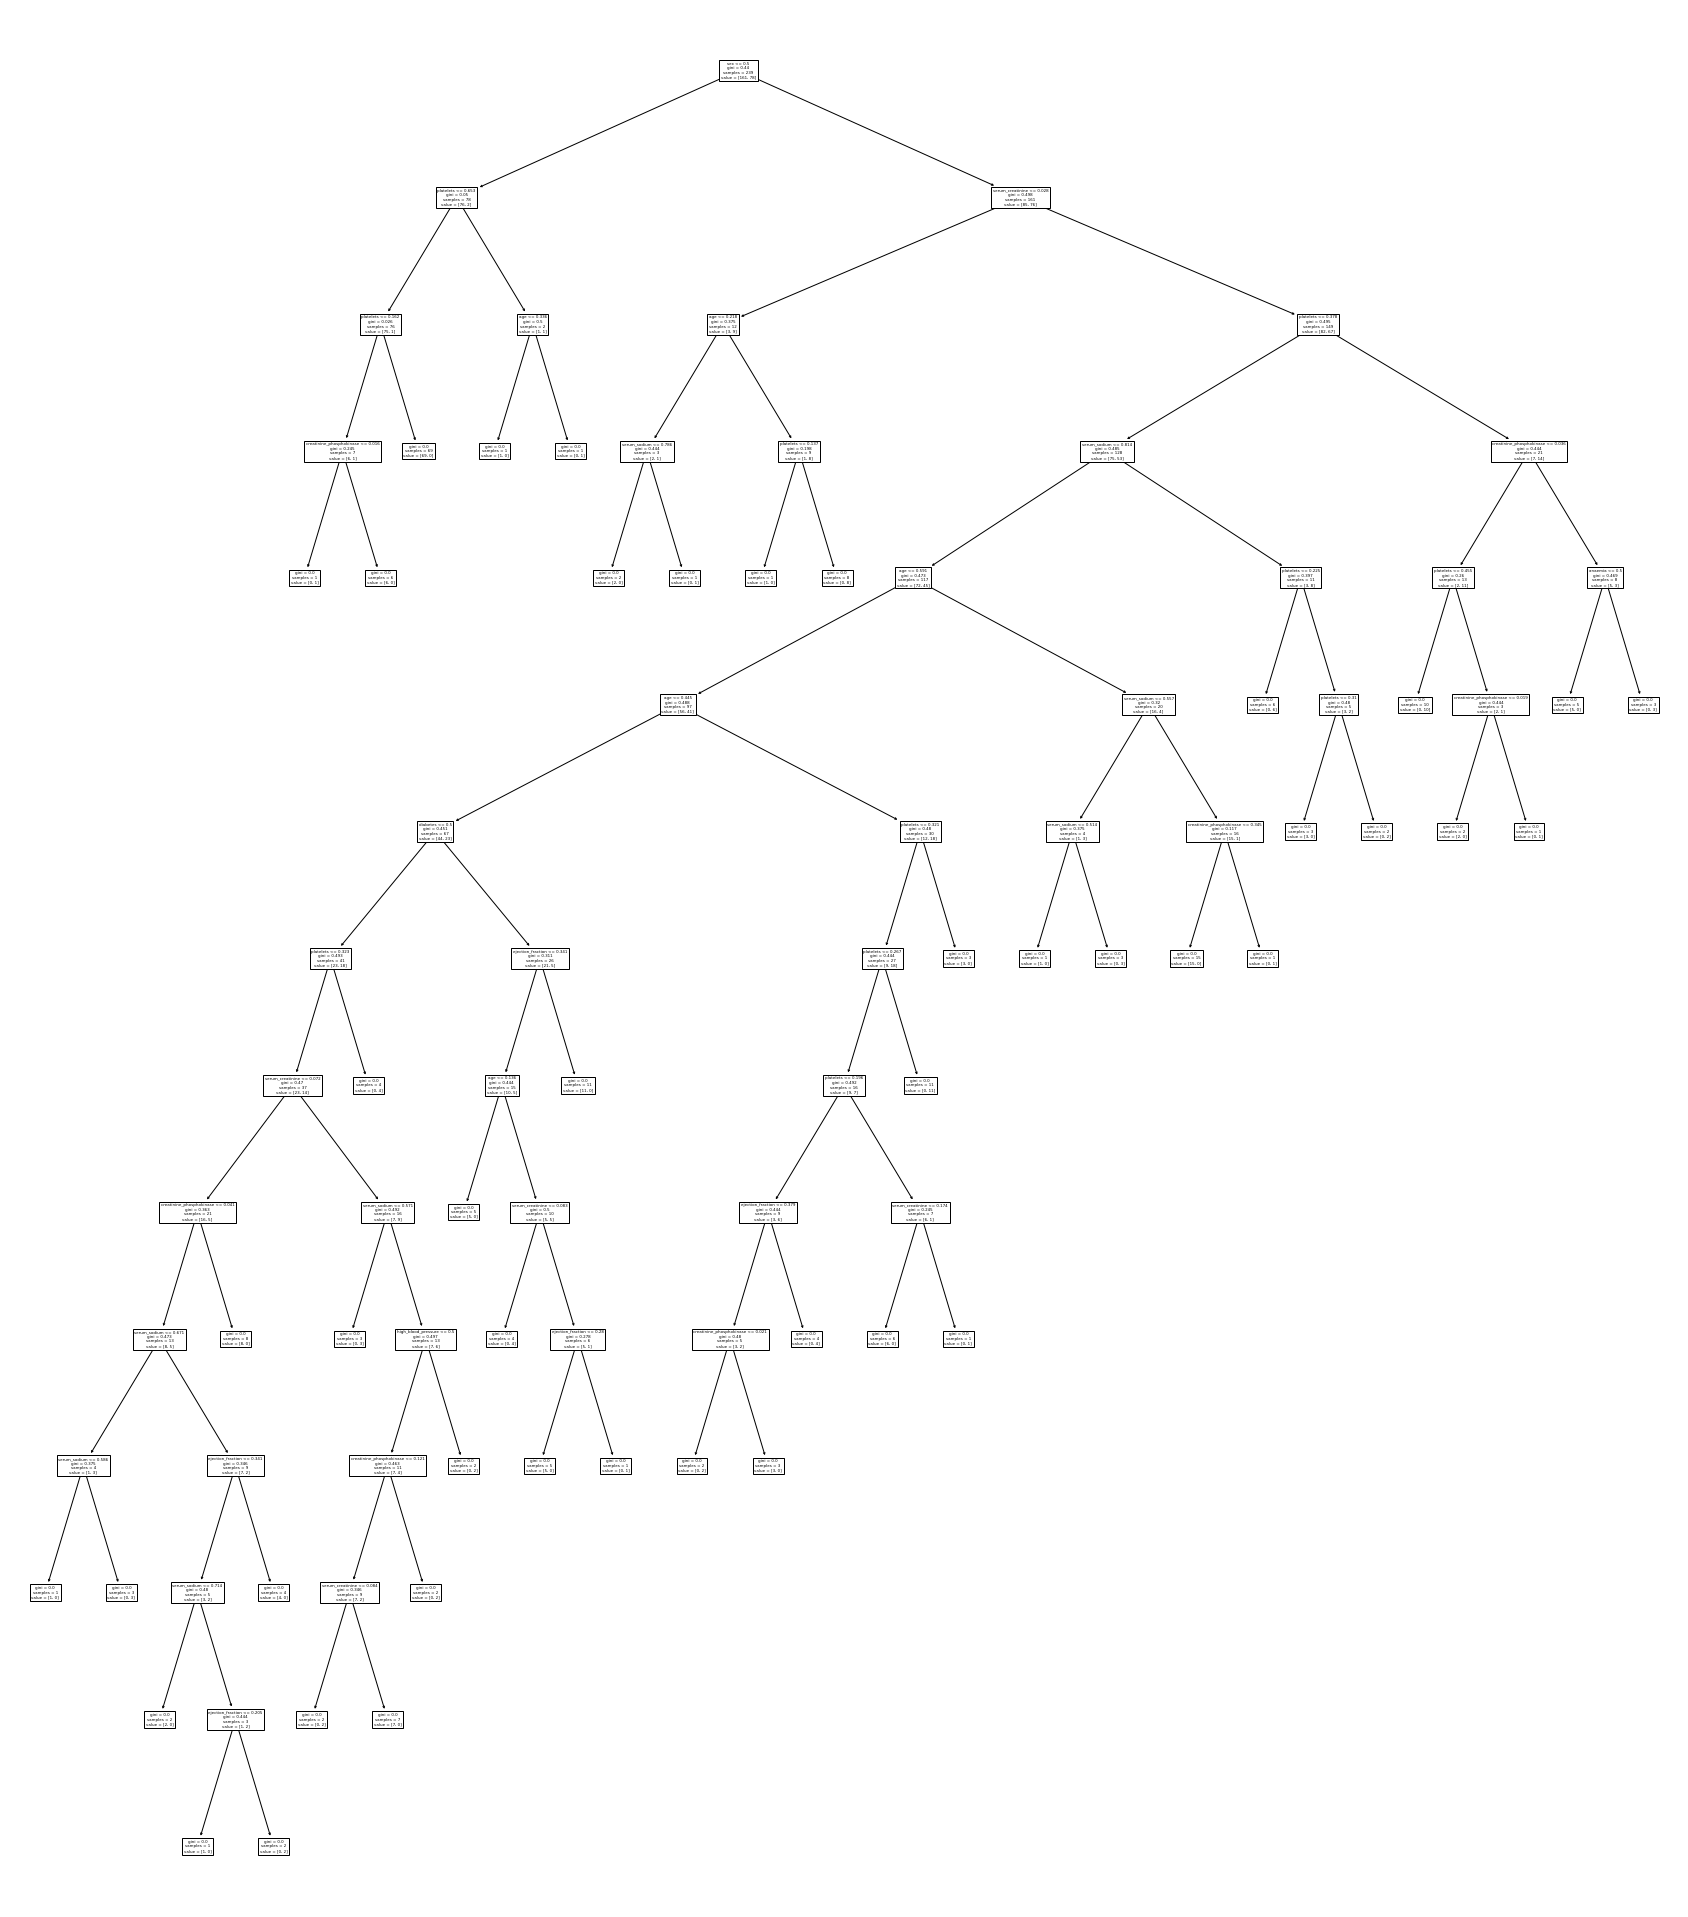

In [145]:
plot_tree(classificador,feature_names=dataFrame.columns[:-3])
plt.show()

In [146]:
classificacao = classificador.predict(X_test)
classificacao

array([0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1.])

In [147]:
for i in range(len(Y_test)):
  print(Y_test.iloc[i],'\t',classificacao[i])

1.0 	 0.0
1.0 	 1.0
0.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 1.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
1.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0


**Avaliação do Classificador**

In [148]:
#calculando acurácia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(Y_test,classificacao)
acuracia

0.7

In [149]:
#calculando precisão
from sklearn.metrics import precision_score
precisao = precision_score(Y_test,classificacao)
precisao


0.5

In [150]:
#calculando recall (revocação)
from sklearn.metrics import recall_score
recall = recall_score(Y_test,classificacao)
recall

0.5555555555555556

In [151]:
#calculando f1-score
from sklearn.metrics import f1_score
f1 = f1_score(Y_test,classificacao)
f1

0.5263157894736842

As métricas acima são usadas para o quão bem foi o comprtamento do modelo

In [152]:
from sklearn.metrics  import roc_curve

A roc_curve é uma representação gráfica do desempenho de um classificador binário, entre a taxa de positivos verdadeiros(trp) e positivos falsos(fpr)

In [153]:
fpr, tpr, _ = roc_curve(Y_test,classificacao)


In [154]:
fpr


array([0.        , 0.23809524, 1.        ])

In [155]:
tpr

array([0.        , 0.55555556, 1.        ])

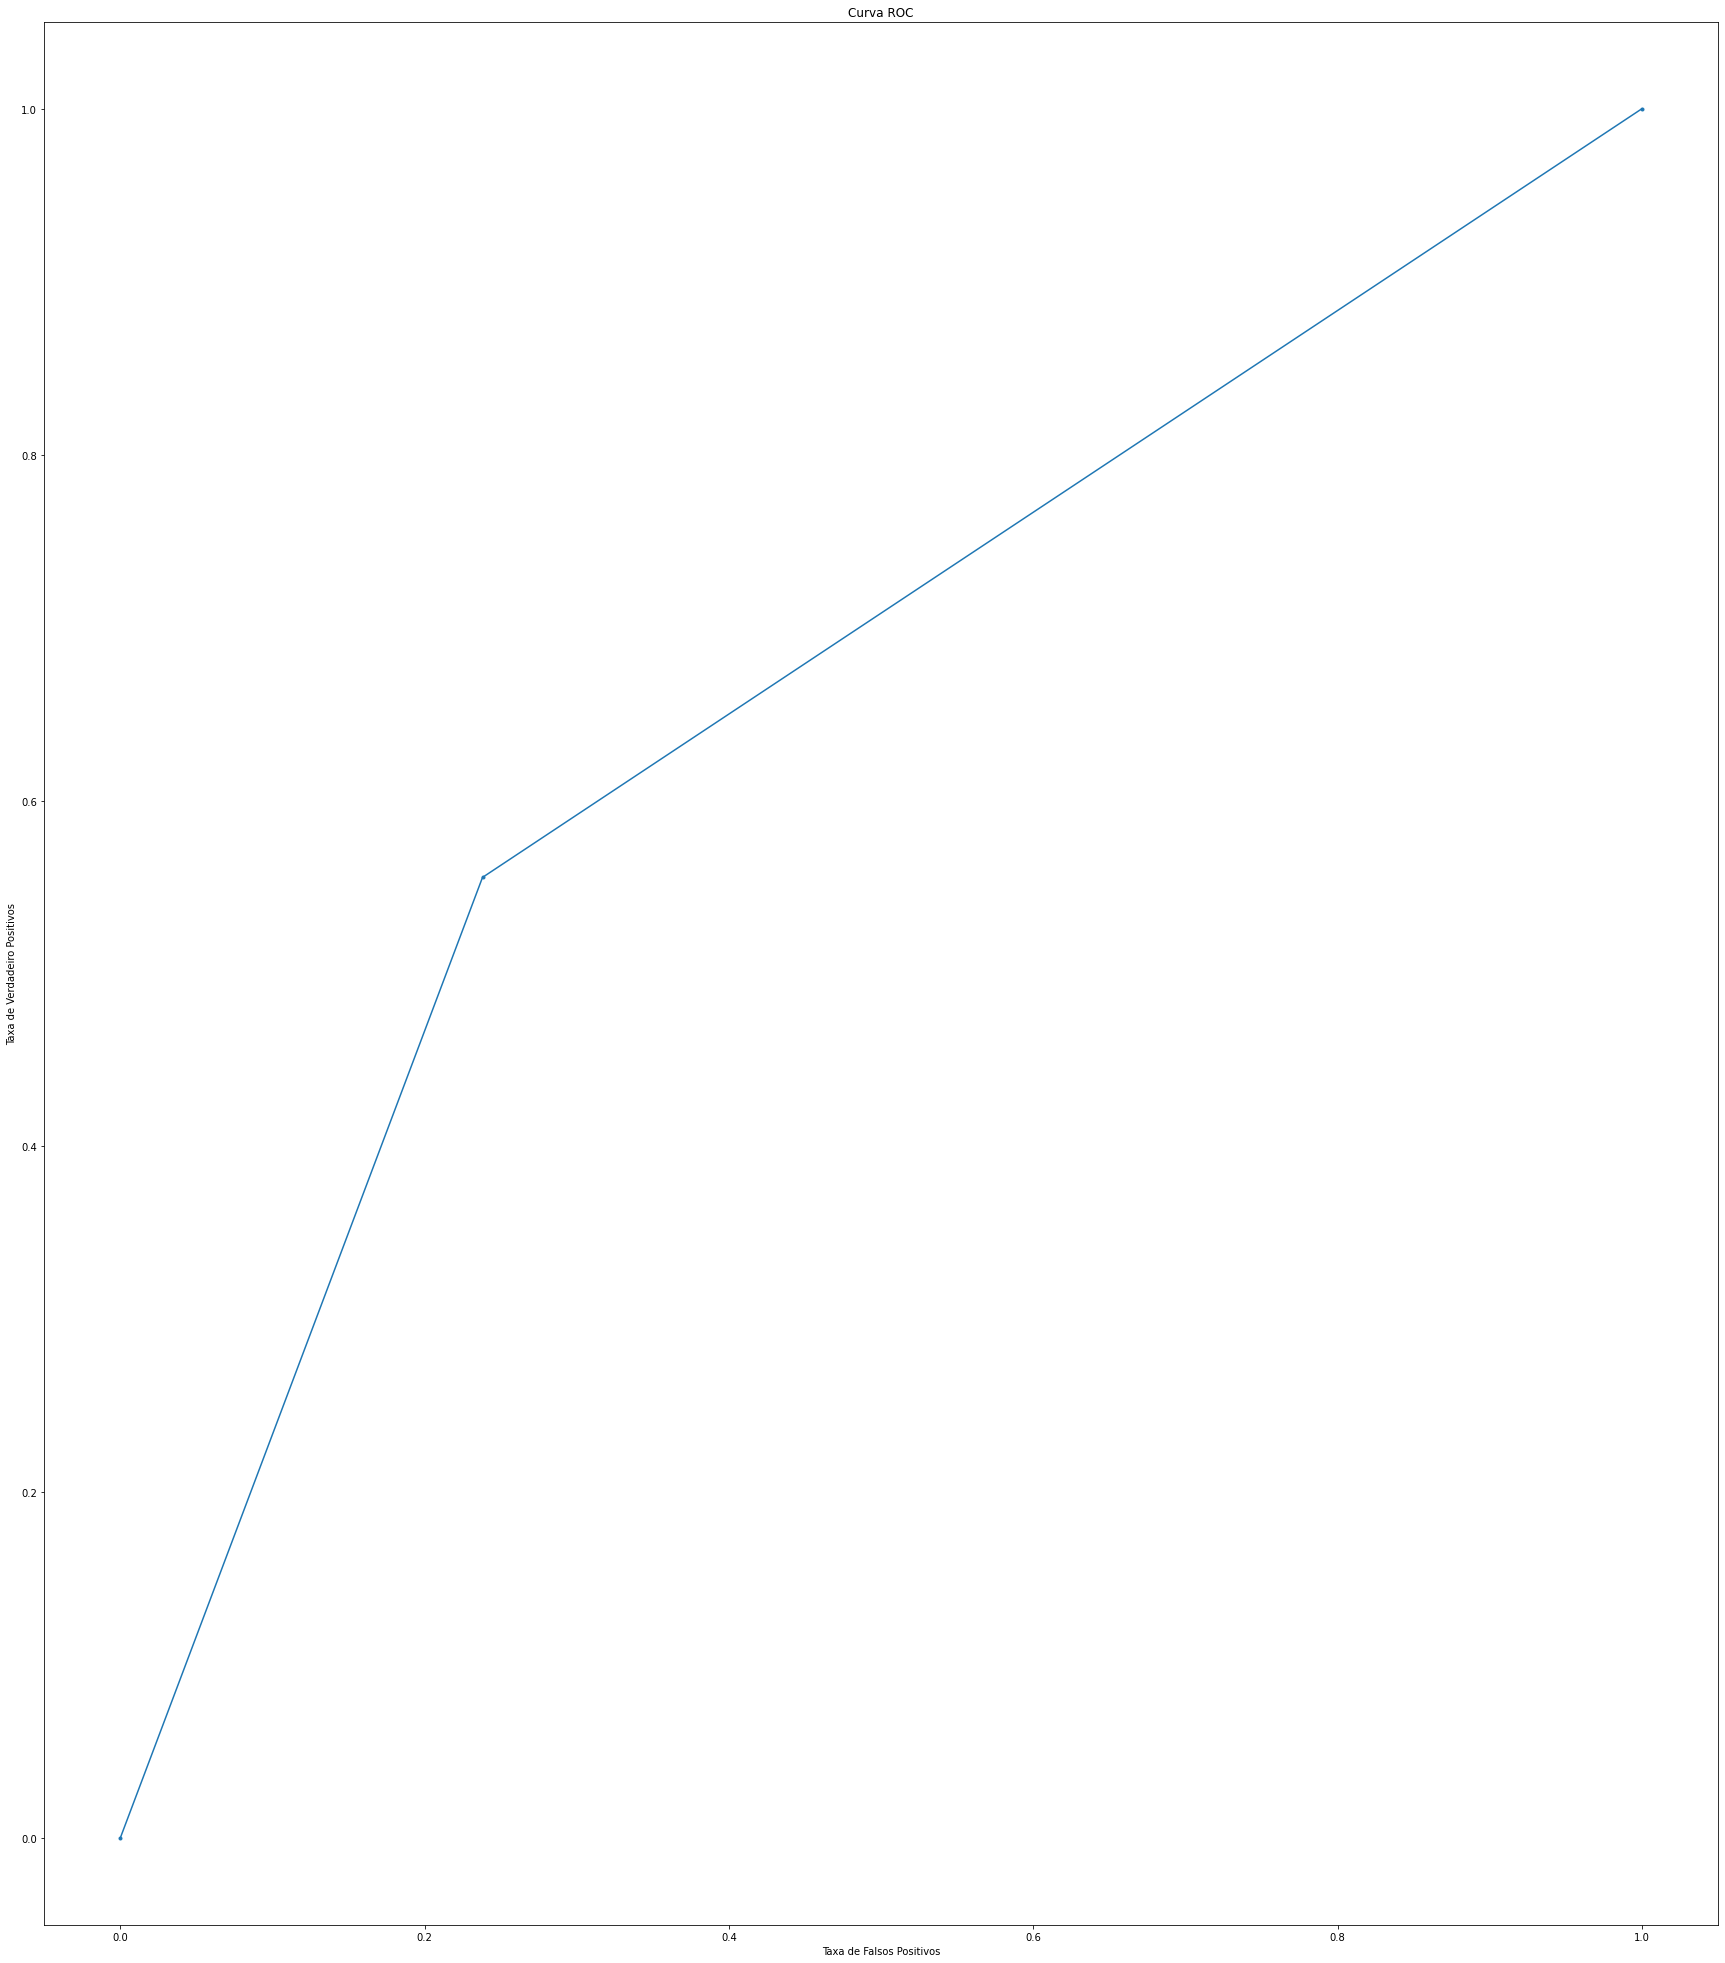

In [156]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

In [157]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score
erro = roc_auc_score(Y_test,classificacao)
erro

0.6587301587301587

**Validação Cruzada**

In [158]:
# montando os folds para validação cruzada
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [159]:
#imprimindo os indices das instancias do treino e teste
for train,test in kf.split(X):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298] 
Teste: [ 0  1  2  3 

In [160]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [161]:
#define modelo
classificador = DecisionTreeClassifier()

In [162]:
#calculando os scores
scores = cross_val_score(classificador,X,Y,cv=10)
scores

array([0.7       , 0.56666667, 0.6       , 0.66666667, 0.73333333,
       0.53333333, 0.7       , 0.7       , 0.66666667, 0.72413793])

In [163]:
scores.mean(),scores.std()


(0.659080459770115, 0.06536623048429709)

A validação cruzada k-fold divide o conjunto de dados em k subconjuntos(folds) disjuntos.

**Comparando Árvore de Decisão e Random Forest**

**Metodo Holdout**

In [178]:
#definindo árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [179]:
#definindo random forest
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [180]:
#calculando acurácia da árvore de decisão
arvore.score(X_test,Y_test)

0.7

In [181]:
#calculando acurácia da random forest
floresta.score(X_train,Y_train)

1.0

In [182]:
#realizando previsão com árvore de decisão
clf_arvore = arvore.predict(X_test)
clf_arvore

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1.])

In [185]:
#realizando previsão com random forest
clf_floresta = floresta.predict(X_test)

In [170]:
#calculando curva roc da árvore de decisão
fpr_ar, tpr_ar, _ = roc_curve(Y_test,clf_arvore)

In [171]:
#calculando curva roc da random forest
fpr_fl, tpr_fl, _ = roc_curve(Y_test,clf_floresta)

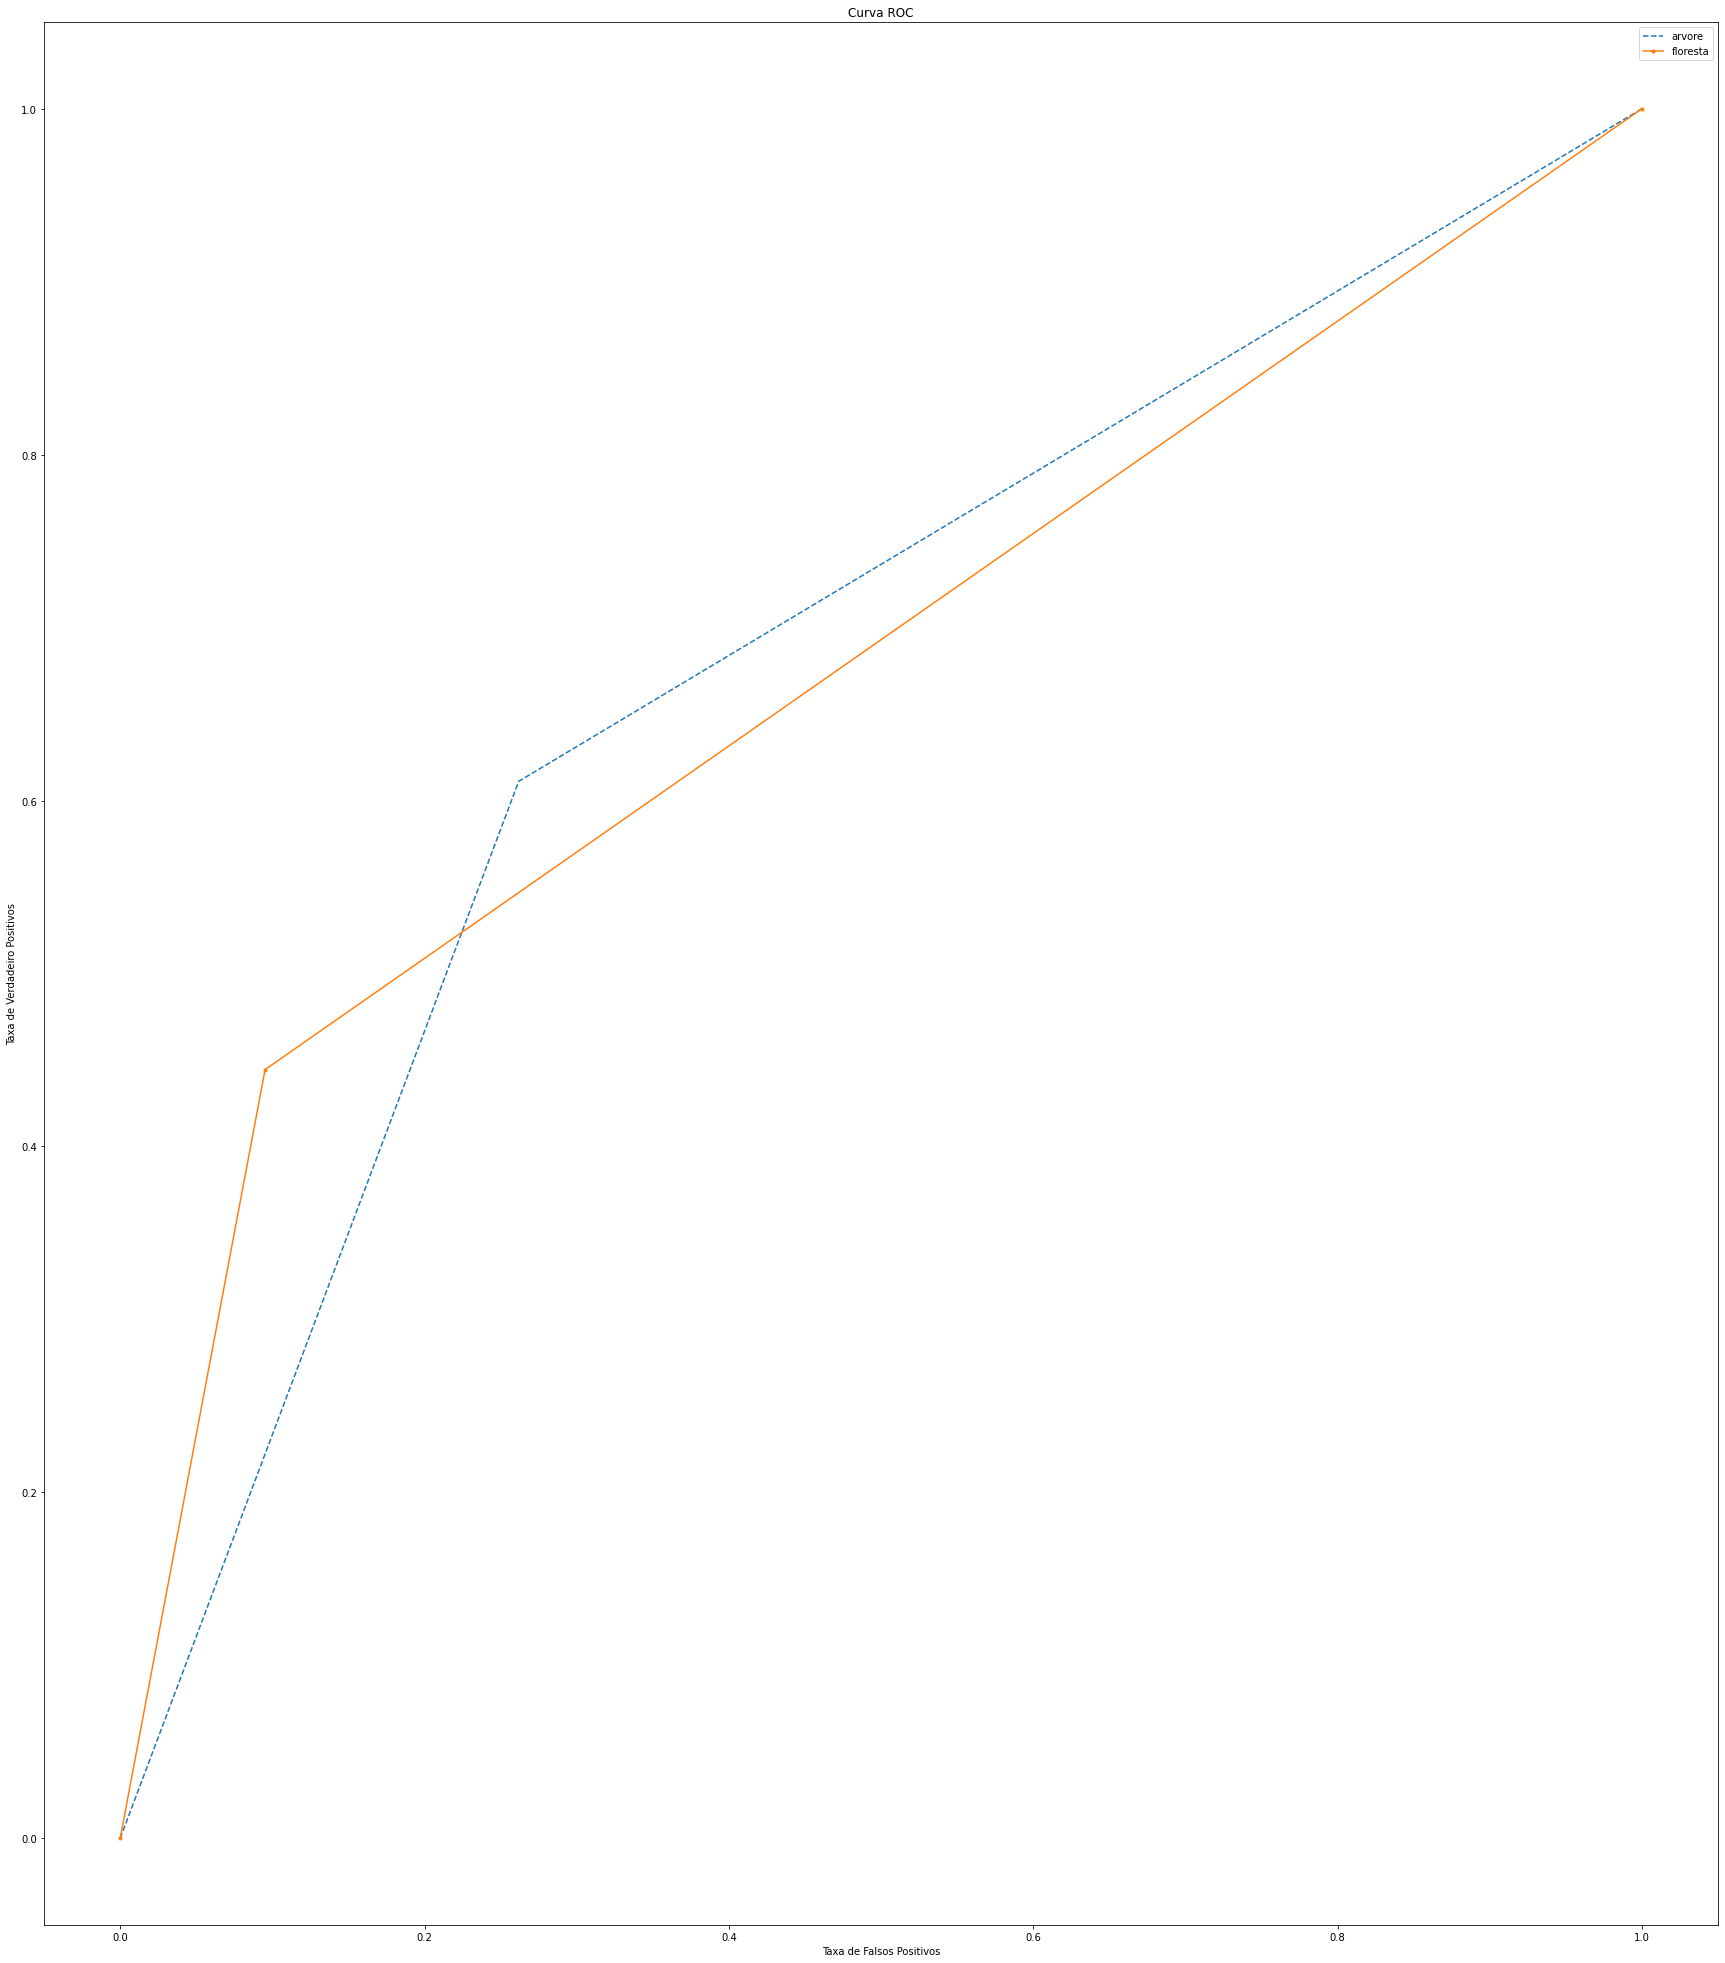

In [172]:
#plotando curvas
plt.plot(fpr_ar,tpr_ar,linestyle='--',label='arvore')
plt.plot(fpr_fl,tpr_fl,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

**Validação Cruzada**

In [173]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores = cross_val_score(arvore,X,Y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.669, 0.073)

In [174]:
#criando árvore
floresta = RandomForestClassifier()

#calculando os scores
scores = cross_val_score(floresta,X,Y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.688, 0.081)

**Análose dos resultados**

O presente dataset contém registros clínicos  com alguns fatores de riscos como ser fumante, diabético, uso de alcool, etc.

Utilisando o atributo smoking com target, buscou-se encontrar a relação entre ser fumante com os demais riscos associados a insuficiência cardíaca.

Utilizando algunas métricas para avaliar obteve os seguintes resultados acurácia 0.666, precisão 0.526, recall 0.476 e f1-score 0.5.

Comparando tanto a acurácia quanto a previsão da árvore de decisão em relação a rendom forest, os resultados obtidos com a random forest mostraram-se melhores em relação dos resultados obtidos com a árvore de decisão.
